In [100]:
%pylab nbagg
from comocmaes_many import Comocmaes
from problems import BiobjectiveConvexQuadraticProblem as problem
import cma
import numpy as np
from cma.fitness_transformations import EvalParallel2

Populating the interactive namespace from numpy and matplotlib


In [86]:
dim = 10
num_kernels = 3

# constructing a 3-objective function: 
myproblem0 = problem(dim, name = "sphere")
biobj = myproblem0.objective_functions()
myproblem1 = problem(dim, name = "sphere")
myproblem1.sep(1)
biobj_bis = myproblem1.objective_functions()

fun2 = biobj[0], biobj[1]
fun3 = biobj[0], biobj[1], biobj_bis[1]

#for 2 objectives:
fun = fun2
refpoint = [1.1, 1.1]

#for 3 objectives: 
fun = fun3 # outcomment if 2 objectives
refpoint = [1.1, 1.1, 1.1] # outcomment if 2 objectives


In [103]:
# Mypb from Frédéric:

def mypb2():
    """
    """
    f1 = lambda x: sum(np.abs(x)**0.8 +5*sin(x**3))
    f2 = lambda x: 10*len(x) + sum(x**2 + - 10*cos(2*np.pi*x)) #rastrigin
    return f1, f2

mypb3 =[
lambda x: sum(np.abs(x)**0.8 +5*sin(x**3)),
lambda x: 10*len(x) + sum(x**2 + - 10*cos(2*np.pi*x)), # rastrigin
lambda x: -10*sum(np.exp(-0.2*np.sqrt(np.abs(x[:-1] + x[1:]))))]


In [47]:
fun = mypb2()
refpoint = [10, 10]

In [104]:
fun = mypb3
refpoint = [10, 10, 10]

In [105]:
f1, f2, f3 = fun

In [106]:
def fitness(x_var):
    return [ f(x_var) for f in fun]

x0 = np.zeros(dim)
sigma0 = 0.2
opts = {'tolx': 10**-6, 'CMA_elitist': False, 'popsize': None}

moes = Comocmaes(3*[x0], sigma0, opts, refpoint) # 5 * [3*[0]] and remove num_kernels

(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 10 (seed=718157, Mon Jul  8 10:57:09 2019)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 10 (seed=614929, Mon Jul  8 10:57:10 2019)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 10 (seed=657212, Mon Jul  8 10:57:10 2019)


In [ ]:
while not moes.stop():
    X = moes.ask()
    F = [fitness(x) for x in X]
    moes.tell(X, F)   # should be able to change the reference point here,
                        # pickle the moes to resume the optimization also

In [107]:
moes.optimize(fitness)

/anaconda3/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: sigma change np.exp(1.1169947619193514) = 3.0556574129236487 clipped to np.exp(+-1) (class=CMAAdaptSigmaCSA method=update iteration=846)
  ')')


In [80]:
moes.stop()

True

<IPython.core.display.Javascript object>


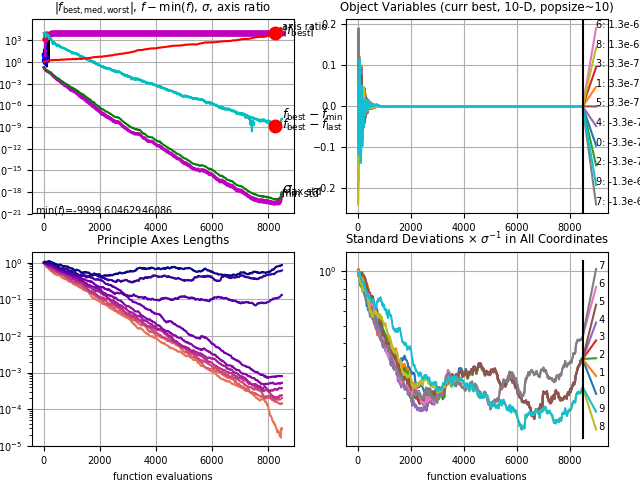

In [109]:
cma.plot("0")

<IPython.core.display.Javascript object>


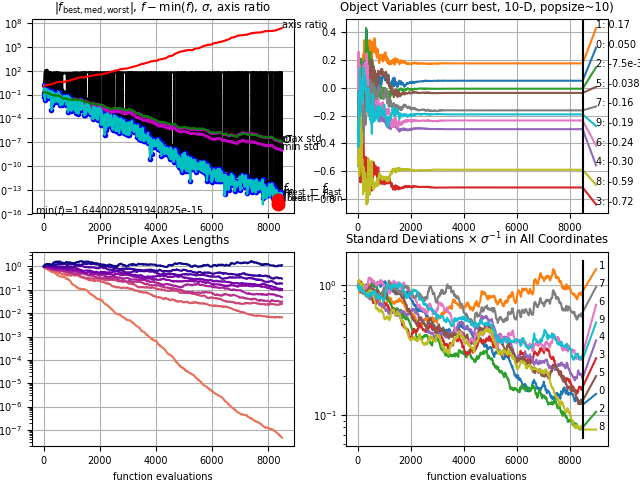

In [110]:
cma.plot("1")

<IPython.core.display.Javascript object>


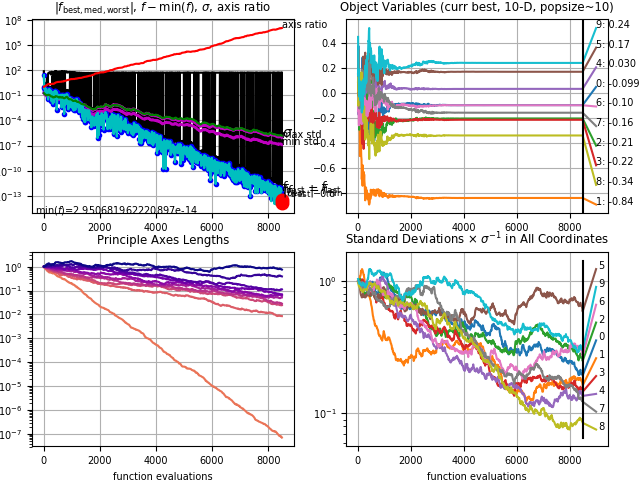

In [111]:
cma.plot("2")

In [116]:
moes = Comocmaes(x0, sigma0, fitness, num_kernels, refpoint)

(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 10 (seed=686232, Mon Jul  8 11:28:15 2019)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 10 (seed=754720, Mon Jul  8 11:28:15 2019)
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 10 (seed=752911, Mon Jul  8 11:28:16 2019)


In [93]:
with EvalParallel2(number_of_processes=4) as eval_all:
    while not moes.stop():
        X = moes.ask()
#        F = [fitness(x) for x in X]
        moes.tell(X, eval_all(X, fitness))
        

In [117]:
while not moes.stop():
    X = moes.ask()
    F = [fitness(x) for x in X]
    moes.tell(X, F)

In [122]:
[]

[]

<IPython.core.display.Javascript object>


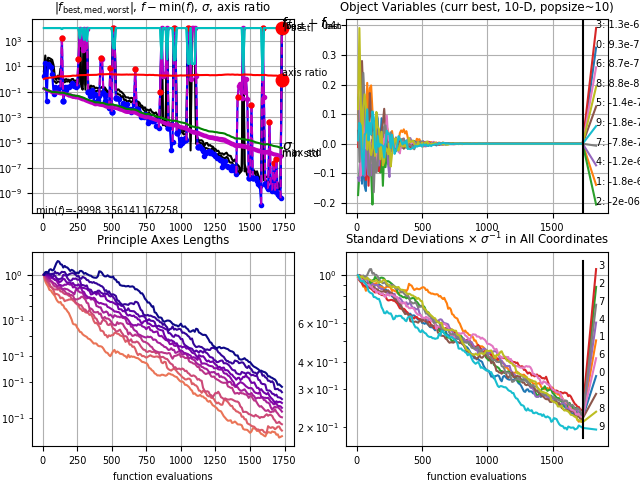

In [118]:
cma.plot("0")

<IPython.core.display.Javascript object>


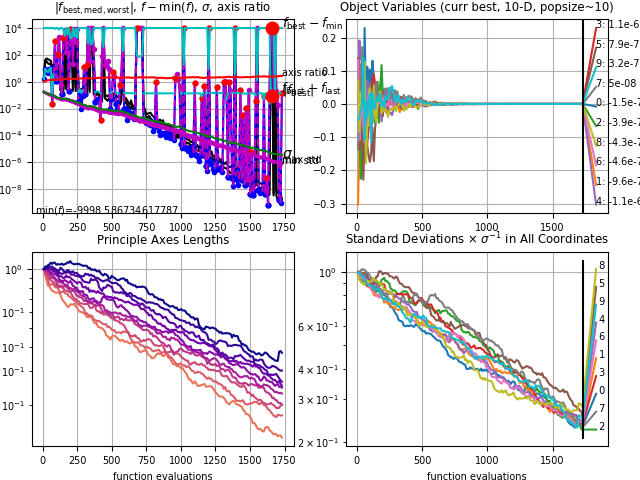

In [119]:
cma.plot("1")

<IPython.core.display.Javascript object>


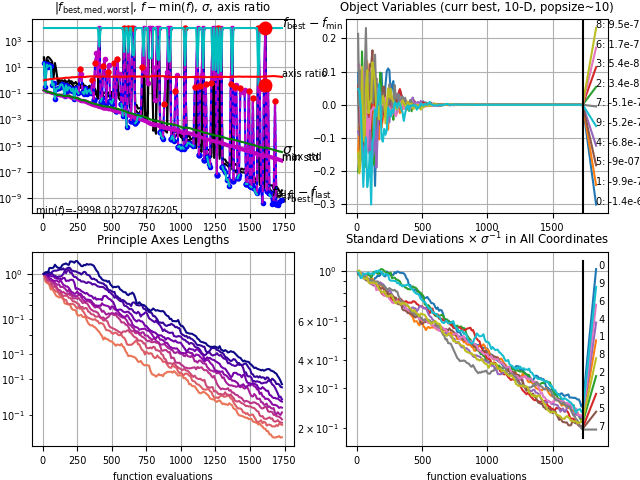

In [120]:
cma.plot("2")

In [43]:
# How to change some CMA options: by using the opts attribute (? I'm not sure that this is what we should do)
kernel = moes.kernels[0]
kernel.opts["popsize"] = 3

In [44]:
kernel.opts["popsize"]

3

In [ ]:
def front2obj(titlelabelsize = 18, axislabelsize = 16):
    """
    """
    plt.figure()
    f1 = np.array([kernel.fit.fitness[0] for kernel in moes.kernels])
    f2 = np.array([kernel.fit.fitness[1] for kernel in moes.kernels])
    plt.grid(which = "major")
    plt.grid(which = "minor")

    plt.plot(f1,f2,'o')
    plt.xlabel('first objective function', fontsize=axislabelsize)
    plt.ylabel('second objective function', fontsize=axislabelsize)
    plt.title("Pareto front, {}D, {} kernels".format(moes.dim,
        moes.num_kernels), fontsize=titlelabelsize)         


In [ ]:
front2obj()

In [ ]:
def front3obj(titlelabelsize = 18, axislabelsize = 16):
    """
    """     


In [97]:
es = cma.CMAEvolutionStrategy(np.zeros(5), 0.2)

(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 5 (seed=650035, Mon Jul  8 10:38:10 2019)


In [98]:
es.optimize(cma.ff.sphere)

Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 1.664536671428118e-02 1.0e+00 1.61e-01  1e-01  2e-01 0:00.0
    2     16 8.460581553670501e-02 1.2e+00 1.42e-01  1e-01  1e-01 0:00.0
    3     24 5.060932008934056e-02 1.3e+00 1.26e-01  1e-01  1e-01 0:00.0
  100    800 6.167962274848900e-12 1.8e+00 1.62e-05  9e-07  1e-06 0:00.1
  122    976 2.293421970859289e-14 1.7e+00 2.81e-06  9e-08  1e-07 0:00.1


In [99]:
es.stop()

{'tolfun': 1e-11}

In [115]:
es.result?

In [114]:
type(es.result)

cma.evolution_strategy.CMAEvolutionStrategyResult

In [123]:
es.opts['verb_filenameprefix']

'outcmaes/'

In [124]:
es.inopts

{}

In [128]:
cma.CMAOptions('prefix')

{'verb_filenameprefix': 'outcmaes/  # output path and filenames prefix'}

In [ ]:
list_of_solvers = Comocmaes.initialize(3*[x0], sigma0, solver_options)
moes = Sofomore(list_of_solvers, options, refpoint)
while not moes.stop():
    X = moes.ask()
    F = [fitness(x) for x in X]
    moes.tell(X, F)